# **Question 1 and 2**
* Use the Univariate_analysis.ipynb and the dataset in EFIplus_medit.zip to plot strip plots, histograms
and boxplots of Annual Mean Temperature (temp_ann) at each of the four catchments with the
highest number of fish sampling sites. Try to fit each type of graph in a single window (4 graphs per
window - check how to do it in previous examples I gave, which are available in github).
* You may change the settings in order to follow the best practices of data visualization (the ones I gave
in the second lesson or other that you feel are also important).






In [56]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

In [57]:
# Load the dataset
data =pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [58]:
data

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
data.drop(data.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
data.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
data.columns = list(map(str, data.columns))

In [60]:
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
data.dtypes


Site_code                                object
Latitude                                float64
Longitude                               float64
Country                                  object
Catchment_name                           object
Water_source_type                        object
Flow_regime                              object
Altitude                                  int64
Geological_typology                      object
Actual_river_slope                      float64
Natural_sediment                        float64
Elevation_mean_catch                    float64
prec_ann_catch                          float64
temp_ann                                float64
temp_jan                                float64
temp_jul                                float64
Barriers_catchment_down                   int64
Barriers_river_segment_up               float64
Barriers_river_segment_down             float64
Barriers_number_river_segment_up        float64
Barriers_number_river_segment_down      

In [61]:
# Number of values per variable
data.count()


Site_code                               5011
Latitude                                5011
Longitude                               5011
Country                                 5011
Catchment_name                          5011
Water_source_type                       4712
Flow_regime                             4473
Altitude                                5011
Geological_typology                     5011
Actual_river_slope                      4975
Natural_sediment                        4402
Elevation_mean_catch                    4841
prec_ann_catch                          4841
temp_ann                                4841
temp_jan                                4841
temp_jul                                4841
Barriers_catchment_down                 5011
Barriers_river_segment_up               5009
Barriers_river_segment_down             5009
Barriers_number_river_segment_up        5008
Barriers_number_river_segment_down      5009
Barriers_distance_river_segment_up      4998
Barriers_d

In [62]:
# Handling missing data
# Number of missing values (NaN) per variable
data.isnull().sum()
df = data.dropna(how='all') # drops rows when  all elements are missing values
df.info()
df = data.dropna(how='all', axis=1) # drops columns when at least one element is a missing value
df.info()
df = data.dropna() # drops rows when at least one element is a missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5011 entries, 0 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822 entries, 18 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 3.3+ MB


In [63]:
df.describe()

,Latitude,Longitude,Altitude,Actual_river_slope,Natural_sediment,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,...,2822.0,2822.000000,2822.000000,2822.0,2822.000000,2822.0,2822.000000,2822.000000,2822.000000,2822.000000
mean,41.931580,-6.706420,344.699504,15.359901,3.113395,668.767532,1069.982431,13.431538,7.043799,19.919206,...,0.0,0.078668,0.001063,0.0,0.000354,0.0,0.253366,0.041460,0.091779,0.032601
std,1.584260,3.199233,291.161869,24.160808,0.619806,371.261338,250.831924,1.908773,2.441084,2.020131,...,0.0,0.269267,0.032593,0.0,0.018824,0.0,0.435016,0.199387,0.288765,0.177621
min,36.874237,-9.459453,1.000000,0.000000,1.000000,52.249944,456.280456,6.700000,-0.200000,14.700000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,41.214742,-8.226473,94.000000,3.990000,3.000000,382.205743,922.392092,12.400000,5.300000,18.500000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,42.542777,-7.556175,292.000000,8.800000,3.000000,590.000078,1074.657843,13.500000,7.300000,19.500000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,43.078987,-6.728577,502.750000,18.226750,3.000000,890.281712,1246.038287,14.600000,8.900000,21.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000
max,43.703384,15.509653,1440.000000,774.000000,4.000000,2003.131476,1739.000486,17.500000,11.900000,25.700000,...,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [64]:
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')
print(catchment_count)

col_0                  count
Catchment_name              
Algarve-Sotavento          6
Algarve-barlavento        10
Campania-South             5
Cantabrica               345
Catala                     2
Douro                    272
Ebro                      61
EntreDouroeVouga           2
Galiza-Norte             702
Galiza-Sul                95
Guadalquivir               1
Guadia                   102
Jucar                      4
Minho                    699
Mira                       5
Mondego                   86
Odelouca                  40
Oeste                     33
Sado                       9
Saline-Pescara-Sangro      1
Segura                     2
Sur                        2
Tejo                     235
Tejo-Sado                  1
Tevere                    45
Vouga                     56
Vouga-Mondego              1


In [65]:
# Get the top 4 catchments with the highest number of fish sampling sites
top_catchments = catchment_count.index[:4]
print(top_catchments)

Index(['Algarve-Sotavento', 'Algarve-barlavento', 'Campania-South',
       'Cantabrica'],
      dtype='object', name='Catchment_name')


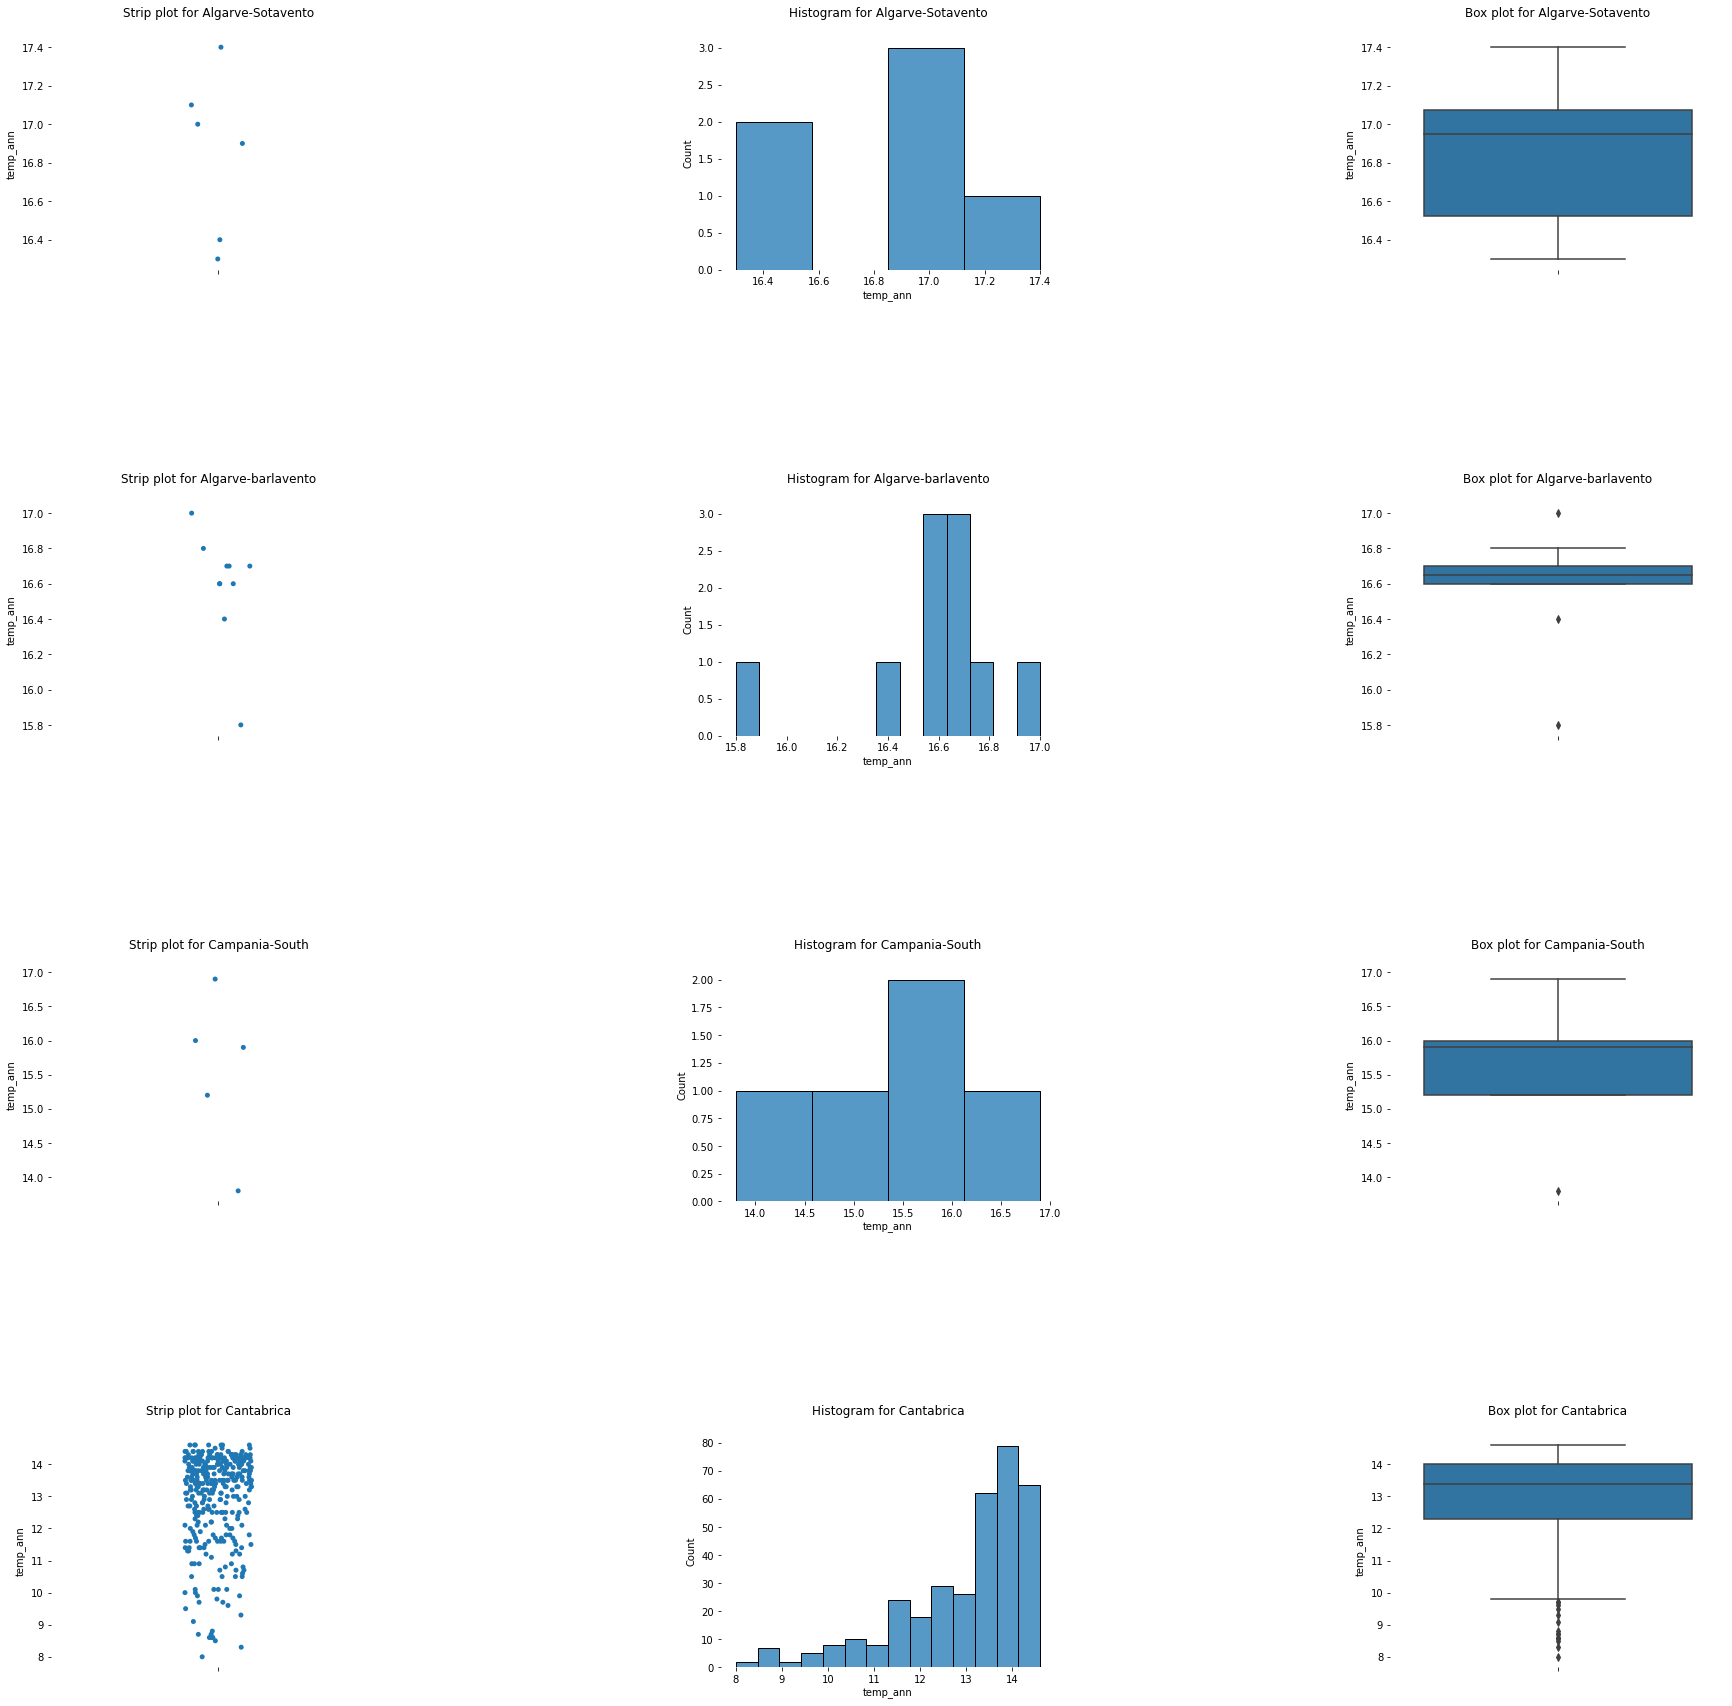

In [66]:

# create subplots
fig, axs = plt.subplots(4, 3, figsize=(30, 30))

# adjust the horizontal space between subplots
fig.subplots_adjust(wspace=1)

# adjust the vertical space between subplots
fig.subplots_adjust(hspace=1)

# iterate over all subplots
for i, catchment in enumerate(top_catchments):
    # Filter the data for the current catchment
    catchment_data = df[df['Catchment_name'] == catchment]

    # Plot strip plot, histogram, and boxplot for Annual Mean Temperature (temp_ann) for the current catchment
    sns.stripplot(y='temp_ann', data=catchment_data, ax=axs[i][0])
    sns.histplot(x='temp_ann', data=catchment_data, ax=axs[i][1])
    sns.boxplot(y='temp_ann', data=catchment_data, ax=axs[i][2])

    # Set titles and labels for the subplots
    axs[i][0].set_title(f'Strip plot for {catchment}', pad=20)
    axs[i][1].set_title(f'Histogram for {catchment}', pad=20)
    axs[i][2].set_title(f'Box plot for {catchment}', pad=20)
    axs[i][0].set_ylabel('temp_ann')
    axs[i][1].set_xlabel('temp_ann')
    axs[i][2].set_ylabel('temp_ann')

    # remove frame of subplots
    for spine in axs[i][0].spines.values():
        spine.set_visible(False)
    for spine in axs[i][1].spines.values():
        spine.set_visible(False)
    for spine in axs[i][2].spines.values():
        spine.set_visible(False)

# Show the plot
plt.show()



# **Question 3** 

*   Have a deeper look at the three types of plots and evaluate the pros and cons of each type as
univariate visualizations.




**The pros and cons of each type of plots  as univariate visualizations:**
> **Strip Plots:** Although strip plots offer a simple way to display individual data points and detect trends, they might not offer an exhaustive overview of data distribution, and they can get overcrowded when the dataset is large.

> **Histograms Plots:** Histograms offer a comprehensive view of data distribution, making them ideal for large datasets and easy to customize, but they are sensitive to bin size and may obscure details, requiring some statistical knowledge for interpretation.


> **Box Plots:** Box plots are an easy-to-read way of showing central tendency and spread of data, and they are resistant to outliers, but they might obscure details and lack information about distribution shape, which may not be suitable for small datasets.



















# **Question 4**


*   I also challenge you to construct a plot that shows how the mean value of temp_ann varies with the
size of random samplings of sites. Take random samples of 10, 50, 100, 150, 200, 250, 300, 500 and
1000, compute the mean Temp_ann for each sample and plot those means with a plot of your choice.




In [67]:
# Create a list of sample sizes
sample_sizes = [10, 50, 100, 150, 200, 250, 300, 500, 1000]

In [68]:
# Create an empty list to store the mean temperature for each sample size
mean_temps = []

In [69]:
# Loop over each sample size
for size in sample_sizes:
    # Take a random sample of the specified size
    sample = df.sample(size)
    # Compute the mean temperature of the sample
    mean_temp = sample['temp_ann'].mean()
    # Add the mean temperature to the list
    mean_temps.append(mean_temp)

In [71]:
mean_temps

[13.210000000000003,
 13.418000000000001,
 13.501000000000001,
 13.713999999999999,
 13.6655,
 13.3616,
 13.471333333333332,
 13.606,
 13.508599999999998]

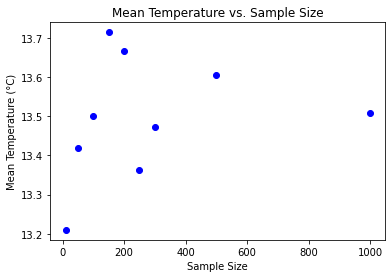

In [77]:
# Create a plot of the mean temperature vs. sample size
plt.scatter(sample_sizes, mean_temps, color='blue')
plt.xlabel('Sample Size')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Temperature vs. Sample Size')
plt.show()
